# **Topic modelling with *kiara***

**Tutorial by [Dr Lorella Viola](https://www.c2dh.uni.lu/people/lorella-viola) and [Mariella de Crouy-Chanel](https://www.c2dh.uni.lu/people/mariella-de-crouy-chanel)**

In this tutorial, you will learn how to use the state-of-the-art data orchestration sofware *kiara* to perform topic modelling on a large-scale corpus of historical texts.

#**Digital research**
As digital methods are more and more used in research, the need for transparency and critical reflection is ever more pressing. Regardless of the type of digital analysis that is performed or even the software that is used, documenting the *process* and not just the product becomes integral to the validity of the research findings.

Despite a fast changing technological landscape, however, there is a frustrating lack of tools that allow you to document the process of digital knowledge production. In other words, how can we keep track of our methodological decisions and interventations?

# **Introducing *kiara***
*kiara* is a state-of-the-art sofware that allows researchers to document and critically reflect not solely on the digital methods and approaches they use, but perhaps more importantly also on how those methods and choices impact on the sources. When you begin using *kiara*, your research choices and changes to the data are recorded so that you will be able to visualise and examine the individual steps you took and how your data changed accordingly. This is important for the researcher, but also for reproducibility and replicability purposes.

*kiara* currently features several digital research approaches such as textual analysis and network analysis. In this tutorial, we will cover **Natural Language Processing** (NLP).

For more information and updates on *kiara*, please check the [project's repository](https://github.com/DHARPA-Project/kiara).

# **Why NLP?**

Natural language processing technology allows researchers to sort through unstructured data such as plain text. In other words, by adding numerical value to the text, computers can 'understand' language and perform advanced operations such as text categorisation, labelling, summarisation and so on. There are two main stages in NLP: pre-processing and analysis (aka, algorithm development and/or implementation). Here we will cover both stages; for the pre-processing part, we will use as an example some of the most common pre-processing operations such as tokenisation, lowercasing, removing stopwords, etc. For the analysis, we will use the example of another widely used large-scale text analysis method called **Topic Modelling**. For more information about the pre-processing operations and topic modelling and a more in-depth discussion of their use particularly in humanities research, please refer to this repository [here](https://github.com/DHARPA-Project/TopicModelling-).

# **The case study: narratives of migration by Italian Americans, 1898-1936**
This tutorial uses *kiara* to examine how the changing experience of migration, identity construction, and assimilation is reflected over time in the accounts of migrants themselves. Using a corpus of Italian American newspapers, the analysis will allow us to address the fundamental question whether ethnic media facilitate assimilation and integration, or rather isolate immigrants from their new society by keeping them in the cultural sphere of their homeland (Parks, 2014).
The case study used for this tutorial is partially based on [Viola and Verheul (2019)](https://academic.oup.com/dsh/article/35/4/921/5601610#209907403).

# **Before starting**
For this tutorial, you will need a basic understanding of Python and how to run Python code, whether that be via Jupyter Notebooks or using a text editor and the command line. We suggest you also install *kiara*. Please refer to the installation procedure [here](http://dharpa.org/kiara.documentation/latest/workshop/workshop/). However, if you use this colab notebook, you can simple run the cell below that will install all the required dependencies for you.

Executing the cell below will install a Kiara plugin into your current virtual environment, here in the virtual environment provided by Google Colaboratory. Kiara plugins enable Python users to create their own set of modules to make them available within Kiara’s architecture. To do that, users first need to install a Kiara plugin template on their computer, as documented [here](https://dharpa.org/kiara.documentation/latest/extending_kiara/creating_modules/the_basics/#check-out-the-kiara-getting-started-guide). Once this is done, users can add their own modules and use them within the Kiara ecosystem as any Kiara module. Once their plugin is ready and available on Github, it can be installed as follows in any notebook project.  

In [ ]:
%%capture
! pip install git+https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023

# **Preparing the environment**
In order to use *kiara* outside of the command line interface (e.g., within a jupyter notebook environemnt), we first need to create a KiaraAPI instance. This allows us to interact with *kiara* programmatically. It also allows us to obtain information on the available operations and on how these operations impact on the sources. For more information about the KiaraAPI, see the *kiara* API documentation [here](https://dharpa.org/kiara/latest/reference/kiara/interfaces/python_api/__init__/#kiara.interfaces.python_api.KiaraAPI).

In [ ]:
from kiara.api import KiaraAPI

kiara = KiaraAPI.instance()

Now that we have created an API instance, we can ask *kiara* to list all the operations that are included with the plugins we installed in the previous step.

In [ ]:
kiara.list_operation_ids()

['create.database.from.file',
 'create.database.from.file_bundle',
 'create.database.from.table',
 'create.stopwords_list',
 'create.table.from.file',
 'create.table.from.file_bundle',
 'date.check_range',
 'date.extract_from_string',
 'dh_benelux_2023.example',
 'download.file',
 'download.file_bundle',
 'export.file.as.file',
 'export.table.as.csv_file',
 'extract.date_array.from.table',
 'file_bundle.pick.file',
 'file_bundle.pick.sub_folder',
 'generate.LDA.for.tokens_array',
 'get_bigrams',
 'get_lccn_metadata',
 'get_text_stats',
 'import.database.from.local_file_path',
 'import.file',
 'import.file_bundle',
 'import.local.file',
 'import.local.file_bundle',
 'import.table.from.local_file_path',
 'import.table.from.local_folder_path',
 'list.contains',
 'logic.and',
 'logic.nand',
 'logic.nor',
 'logic.not',
 'logic.or',
 'logic.xor',
 'onboard.zenodo_record',
 'parse.date_array',
 'preprocess.tokens_array',
 'query.database',
 'query.table',
 'string_filter.tokens',
 'table.pick

# **Data onboarding**
In this tutorial, we will be using a sample from [*ChroniclItaly 3.0*](https://zenodo.org/record/4596345#.ZFJaGnZBw2w) (Viola and Fiscarelli 2021, Viola 2021), an open access digital heritage collection of Italian immigrant newspapers published in the United States from 1898 to 1936. This corpus includes the digitized (OCRed) front pages of ten Italian American newspapers as collected from [*Chronicling America*](https://chroniclingamerica.loc.gov/), an Internet-based, searchable database of U.S. newspapers published in the United States from 1789 to 1963 made available by the Library of Congress. In this tutorial, the sample we are using contains the mainstream newspaper *L'Italia* and the anarchic newspaper *Cronaca Sovversiva*.
We wil be using topic modelling to analyse the topics discussed by Italian American migrants in the two newspapers of different political orientation. We aim to obtain insights into how migration was experienced by the diverse Italian community, but also how it was narrated to the migrants themselves.

# **The power of metadata**

The corpus is also a good example of how *kiara* can help us use metadata for historical research. Let's see how this works.

In [ ]:
inputs = {
    "url": "https://github.com/DHARPA-Project/kiara.examples/archive/refs/heads/main.zip",
    "sub_path": "kiara.examples-main/examples/workshops/dh_benelux_2023/data"
 }

dl_bundle = kiara.run_job('download.file_bundle', inputs=inputs)
dl_bundle

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field               value                                                                                                              │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   download_metadata                                                                                                                      │
│                         dict data     {                                                                                                  │
│                                         "response_headers": [                                                                            │
│                                           {                                                                                              │
│                                             "access-control-allow-origin": "https://render.githubusercontent.com",                       │
│                                             "content-disposition": "attachment; filename=kiara.examples-main.zip",                       │
│                                             "content-security-policy": "default-src 'none'; style-src 'unsafe-inline'; sandbox",         │
│                                             "content-type": "application/zip",                                                           │
│                                             "cross-origin-resource-policy": "cross-origin",                                              │
│                                             "etag": "W/\"9fce3adcfc24ff8d086e7295ec9ed1b35c11f7699b2cad4f3ed748473e6ad96b\"",            │
│                                             "strict-transport-security": "max-age=31536000",                                             │
│                                             "vary": "Authorization,Accept-Encoding,Origin",                                              │
│                                             "x-content-type-options": "nosniff",                                                         │
│                                             "x-frame-options": "deny",                                                                   │
│                                             "x-xss-protection": "1; mode=block",                                                         │
│                                             "date": "Tue, 19 Sep 2023 09:05:47 GMT",                                                     │
│                                             "transfer-encoding": "chunked",                                                              │
│                                             "x-github-request-id": "DF28:5C32:C2AA0:1317B9:6509646A"                                     │
│                                           },                                                                                             │
│                                           {                                                                                              │
│                                             "server": "GitHub.com",                                                                      │
│                                             "date": "Tue, 19 Sep 2023 09:05:46 GMT",                                                     │
│                                             "content-type": "text/html; charset=utf-8",                                                  │
│                                             "vary": "X-PJAX, X-PJAX-Container, Turbo-Visit, Turbo-Frame, Accept-Encoding, Accept, X…     │
│                                             "locat

Great, we've successfully imported a bundle of files. This has given us both the name of the folders in which we have our files (in this case, the newspaper's title), and the files themselves. As you can see, *kiara* also gives us additional information, for example how many files we have imported and the space the files occupy. This information may be useful to keep track of how we have changed our files after intervening on them. But we can also push this further and ask *kiara* to give us more information on the composition of the files.

For now, let's give them some structure. *kiara* provides us with meta information on each of its functions. This built-in documentation is also helpful for teaching purposes. We can access this in-built documentation at any time by calling `kiara.list_operation_ids()`

In [ ]:
kiara.list_operation_ids()

['create.database.from.file',
 'create.database.from.file_bundle',
 'create.database.from.table',
 'create.stopwords_list',
 'create.table.from.file',
 'create.table.from.file_bundle',
 'date.check_range',
 'date.extract_from_string',
 'dh_benelux_2023.example',
 'download.file',
 'download.file_bundle',
 'export.file.as.file',
 'export.table.as.csv_file',
 'extract.date_array.from.table',
 'file_bundle.pick.file',
 'file_bundle.pick.sub_folder',
 'generate.LDA.for.tokens_array',
 'get_bigrams',
 'get_lccn_metadata',
 'get_text_stats',
 'import.database.from.local_file_path',
 'import.file',
 'import.file_bundle',
 'import.local.file',
 'import.local.file_bundle',
 'import.table.from.local_file_path',
 'import.table.from.local_folder_path',
 'list.contains',
 'logic.and',
 'logic.nand',
 'logic.nor',
 'logic.not',
 'logic.or',
 'logic.xor',
 'onboard.zenodo_record',
 'parse.date_array',
 'preprocess.tokens_array',
 'query.database',
 'query.table',
 'string_filter.tokens',
 'table.pick

To give our files structure, the easiest way is to create a dataframe to contain our files and metadata. Now that we have a list of all the possible operations available in *kiara*, let's have a look at `create.table.from.file_bundle` more closely.

In [ ]:
kiara.retrieve_operation_info('create.table.from.file_bundle')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         tabular                                                                                                   
                     Labels       package: kiara_plugin.tabular                                                                             
                     References   source_repo: ]8;id=224745;https://github.com/DHARPA-Project/kiara_plugin.tabular\https://github.com/DHARPA-Project/kiara_plugin.tabular]8;;\                                       
                                  documentation: ]8;id=197674;https://DHARPA-Project.github.io/kiara_plugin.tabular/\https://DHARPA-Project.github.io/kiara_plugin.tabular/]8;;\                                     
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Create a table value from a text file_bundle.                                                          
                                                                                                                                            
                                     The resulting table will have (at a minimum) the following collumns:                                   
                                     - id: an auto-assigned index                                                                           
                                     - rel_path: the relative path of the file (from the provided base path)                                
                                     - content: the text file content                                                                       
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name    type          description                              Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       file_bundle   file_bundle   The source value (of type                yes        -- no default --     
                                                                   'file_bundle').                                                          
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name   type    description                                                                     
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       t

Now that we know what `create.table.from.file_bundle` does, we can use it on our sources.

In [ ]:
inputs = {
    'file_bundle' : dl_bundle['file_bundle']
}

corpus_table = kiara.run_job('create.table.from.file_bundle', inputs=inputs)
corpus_table

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field   value                                                                                                                          │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   table                                                                                                                                  │
│             id     rel_path                        mime_type    size    content                        file_name                         │
│            ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│             0      Cronaca_Sovversiva/2012271201   text/plain   10428   LI 1,111 """"                  2012271201_1903-06-06_ed-1_se     │
│             1      Cronaca_Sovversiva/2012271201   text/plain   11730   Ebdomadario anarchico di pro   2012271201_1903-06-13_ed-1_se     │
│             2      Cronaca_Sovversiva/2012271201   text/plain   11482   ANNO I.                        2012271201_1903-06-20_ed-1_se     │
│             3      Cronaca_Sovversiva/2012271201   text/plain   10839   Ebdomadàrio anarchico di pro   2012271201_1903-06-27_ed-1_se     │
│             4      Cronaca_Sovversiva/2012271201   text/plain   11032   NUMERO 5                       2012271201_1903-07-04_ed-1_se     │
│             5      Cronaca_Sovversiva/2012271201   text/plain   10648   ANNO I.                        2012271201_1903-07-25_ed-1_se     │
│             6      Cronaca_Sovversiva/2012271201   text/plain   10682   ANNO I.                        2012271201_1903-08-01_ed-1_se     │
│             7      Cronaca_Sovversiva/2012271201   text/plain   11522   Ciac vtj'y inn                 2012271201_1903-08-08_ed-1_se     │
│             8      Cronaca_Sovversiva/2012271201   text/plain   11988   NUMERO 11                      2012271201_1903-08-15_ed-1_se     │
│             9      Cronaca_Sovversiva/2012271201   text/plain   11286   Ebdomadario anarchico di pro   2012271201_1903-08-22_ed-1_se     │
│             10     Cronaca_Sovversiva/2012271201   text/plain   10835   SUMERO 13                      2012271201_1903-08-29_ed-1_se     │
│             11     Cronaca_Sovversiva/2012271201   text/plain   10750   Ebdomadario anarchico di pro   2012271201_1903-09-05_ed-1_se     │
│             12     Cronaca_Sovversiva/2012271201   text/plain   11003   ANNO I.                        2012271201_1903-09-12_ed-1_se     │
│             13     Cronaca_Sovversiva/2012271201   text/plain   11198   ANNO I.                        2012271201_1903-09-19_ed-1_se     │
│             14     Cronaca_Sovversiva/2012271201   text/plain   10860   NUMERO 17                      2012271201_1903-09-26_ed-1_se     │
│             15     Cronaca_Sovversiva/2012271201   text/plain   10778   li                             2012271201_1903-10-03_ed-1_se     │
│             ...    ...                             ...          ...     ...                            ...                               │
│             ...    ...                             ...          ...     ...                            ...                               │
│             7244   L'Italia/sn85066408_1919-12-1   text/plain   18674   ANNO XXXIII-                   sn85066408_1919-12-15_ed-1_se     │
│             7245   L'Italia/sn85066408_1919-12-1   text/plain   19692   anno xxxiii.                   sn85066408_1919-12-16_ed-1_se     │
│             7246   L'Italia/sn85066408_1919-12-1   text/plain   24491   ANNO XXXIII                    sn85066408_1919-12-17_ed-1_se     │
│             7247   L'Italia/sn85066408_1919-12-1  

*kiara* has taken all the information from our files and added it to a table thus making it a bit easier to navigate. But *kiara* can also perform other meta-analytical operations on our files to enhance our understanding of our sources, for example it can extract metadata information. Let's see how this works.

# **Extracting metadata**

When working with historical sources, the possibility to extract metadata information from the files can be a very valuable feature. Currently, kiara is able to extract metadata from strings that comply with the Library of Congress (LCCN) catalogue pattern: '/LCCN/yyyy-mm-dd/'. This adds the publication reference (i.e., LCCN) and the dates to a table as two new columns. Moreover, if a mapping scheme is provided between publication references and publication, kiara will add a column with the publication names. The mapping scheme should look like this:

[["LCCN","LCCN","LCCN"],["name","name","name"]]

For example, the file name ‘sn84037025_1917-04-14_ed-1_seq-1_ocr.txt’ refers to the OCR text file of the first page of the first edition of the title *La Rassegna* published on 14 April 1917. If your files also contain metadata information, *kiara* allows you to retrieve both the files and the metadata in the filenames. This is very useful for historical research, but also to keep track of how we are intervening on our sources.

Let's have a look at this specific module.


In [ ]:
kiara.retrieve_operation_info('get_lccn_metadata')

Author(s)                                                                                                                                  
                     Lorella Viola       lorella.viola@uni.lu                                                                               
                     Mariella De Crouy   mariella.decrouychanel@uni.lu                                                                      
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_benelux_2023                                                                                           
                     Labels       package: kiara_plugin.dh_benelux_2023                                                                     
                     References   source_repo: ]8;id=582417;https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023]8;;\                               
                                  documentation: ]8;id=183533;https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/]8;;\                             
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   This module will get metadata from strings that comply with LCCN pattern: '/sn86069873/1900-01-05/'    
                                     to get the publication references and the dates and add those informations as two new columns.         
                                                                                                                                            
                                     In addition, if a mapping scheme is provided between publication references and publication names,     
                                     it will add a column with the publication names.                                                       
                                     Such a map is provided in the form of a list of lists with publication references and publication      
                                     names in the same order.                                                                               
                                     Here is an example of how it should look:                                                              
                                     [["2012271201","sn85054967","sn93053873"],["Cronaca_Sovversiva","Il_Patriota","L'Indipendente"]]       
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name    type     description                                   Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table_input   table    The corpus for which we want to get           yes        -- no default --     
                                                              metadata from file names.                                                     
                                       column_name   string   The column containing metadata. In order to   yes        -- no default --     
                        

If your files also comply with the LCC, give it a try, if not, you can skip this step.

In [ ]:
inputs = {
    'table_input' : corpus_table['table'],
    'column_name' : 'rel_path',
    'map': [['2012271201','sn85054967','sn93053873','sn85066408','sn85055164','sn84037024','sn84037025','sn84020351','sn86092310','sn92051386'],['Cronaca_Sovversiva','Il_Patriota','L\'Indipendente','L\'Italia','La_Libera_Parola','La_Ragione','La_Rassegna','La_Sentinella','La_Sentinella_del_West','La_Tribuna_del_Connecticut']]
}

corpus_metadata = kiara.run_job('get_lccn_metadata', inputs=inputs)
corpus_metadata

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   table_output                                                                                                                           │
│                    id     rel_path       mime_type    size    content         file_name      date         pub_ref      pub_name          │
│                   ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                    0      Cronaca_Sovv   text/plain   10428   LI 1,111 """"   2012271201_1   1903-06-06   2012271201   Cronaca_Sovve     │
│                    1      Cronaca_Sovv   text/plain   11730   Ebdomadario a   2012271201_1   1903-06-13   2012271201   Cronaca_Sovve     │
│                    2      Cronaca_Sovv   text/plain   11482   ANNO I.         2012271201_1   1903-06-20   2012271201   Cronaca_Sovve     │
│                    3      Cronaca_Sovv   text/plain   10839   Ebdomadàrio a   2012271201_1   1903-06-27   2012271201   Cronaca_Sovve     │
│                    4      Cronaca_Sovv   text/plain   11032   NUMERO 5        2012271201_1   1903-07-04   2012271201   Cronaca_Sovve     │
│                    5      Cronaca_Sovv   text/plain   10648   ANNO I.         2012271201_1   1903-07-25   2012271201   Cronaca_Sovve     │
│                    6      Cronaca_Sovv   text/plain   10682   ANNO I.         2012271201_1   1903-08-01   2012271201   Cronaca_Sovve     │
│                    7      Cronaca_Sovv   text/plain   11522   Ciac vtj'y in   2012271201_1   1903-08-08   2012271201   Cronaca_Sovve     │
│                    8      Cronaca_Sovv   text/plain   11988   NUMERO 11       2012271201_1   1903-08-15   2012271201   Cronaca_Sovve     │
│                    9      Cronaca_Sovv   text/plain   11286   Ebdomadario a   2012271201_1   1903-08-22   2012271201   Cronaca_Sovve     │
│                    10     Cronaca_Sovv   text/plain   10835   SUMERO 13       2012271201_1   1903-08-29   2012271201   Cronaca_Sovve     │
│                    11     Cronaca_Sovv   text/plain   10750   Ebdomadario a   2012271201_1   1903-09-05   2012271201   Cronaca_Sovve     │
│                    12     Cronaca_Sovv   text/plain   11003   ANNO I.         2012271201_1   1903-09-12   2012271201   Cronaca_Sovve     │
│                    13     Cronaca_Sovv   text/plain   11198   ANNO I.         2012271201_1   1903-09-19   2012271201   Cronaca_Sovve     │
│                    14     Cronaca_Sovv   text/plain   10860   NUMERO 17       2012271201_1   1903-09-26   2012271201   Cronaca_Sovve     │
│                    15     Cronaca_Sovv   text/plain   10778   li              2012271201_1   1903-10-03   2012271201   Cronaca_Sovve     │
│                    ...    ...            ...          ...     ...             ...            ...          ...          ...               │
│                    ...    ...            ...          ...     ...             ...            ...          ...          ...               │
│                    7244   L'Italia/sn8   text/plain   18674   ANNO XXXIII-    sn85066408_1   1919-12-15   sn85066408   L'Italia          │
│                    7245   L'Italia/sn8   text/plain   19692   anno xxxiii.    sn85066408_1   1919-12-16   sn85066408   L'Italia          │
│                    7246   L'Italia/sn8   text/plain   24491   ANNO XXXIII     sn85066408_1   1919-12-17   sn85066408   L'Italia          │
│                    7247   L'Italia/sn8   text/plai

Great! Now we know the publication name and the date of each individual file. This information can be very valuable particularly in topic modelling. For example, here we would like to analyse if newspapers of different political orientation pushed different narratives of migration so knowing the publication title can bring important insights.

Similarly, knowing how many words each document has can be very important for linguistic analysis but also to keep track of how we change our files as we proceed with our analysis. Let's have a look at this specific module.

# **Exploring the files**
In the first step of NLP, texts are typically heavily pre-processed as we will see in the next steps of this tutorial. The idea is that the machine will be able to capture more information if we modify the files than if we didn't. However, every time we perform a pre-processing operation on our sources, we in fact may lose significant amounts of information. Keeping track of how much we have to 'sacrifice' for the sake of the computational analyisis can raise awareness of the challenges of digital analyisis.
As ususal, let's first call the meta-information available in *kiara*.

In [ ]:
kiara.retrieve_operation_info('get_text_stats')

Author(s)                                                                                                                                  
                     Lorella Viola       lorella.viola@uni.lu                                                                               
                     Mariella De Crouy   mariella.decrouychanel@uni.lu                                                                      
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_benelux_2023                                                                                           
                     Labels       package: kiara_plugin.dh_benelux_2023                                                                     
                     References   source_repo: ]8;id=461741;https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023]8;;\                               
                                  documentation: ]8;id=617791;https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/]8;;\                             
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   This module will add columns with words and characters count to a table containing text content.       
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name    type     description                                   Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table_input   table    The corpus for which we want to add words     yes        -- no default --     
                                                              and characters count.                                                         
                                       column_name   string   The column containing the text for which we   yes        -- no default --     
                                                              want the count.                                                               
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name     type    description                                                                   
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table_output   table   Augmented table containing words and characters count.                        
                                                                                                                                            
                  

Let's now run this module on our corpus.

In [ ]:
inputs = {
    'table_input' : corpus_metadata['table_output'],
    'column_name' : 'content'
}

text_stats = kiara.run_job('get_text_stats', inputs=inputs)
text_stats

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   table_output                                                                                                                           │
│                    id     rel_path   mime_typ   size    content    file_nam   date       pub_ref    pub_name    chars_co   words_cou     │
│                   ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                    0      Cronaca_   text/pla   10428   LI 1,111   20122712   1903-06-   20122712   Cronaca_S   10345      1706          │
│                    1      Cronaca_   text/pla   11730   Ebdomada   20122712   1903-06-   20122712   Cronaca_S   11648      2167          │
│                    2      Cronaca_   text/pla   11482   ANNO I.    20122712   1903-06-   20122712   Cronaca_S   11397      1890          │
│                    3      Cronaca_   text/pla   10839   Ebdomadà   20122712   1903-06-   20122712   Cronaca_S   10748      1700          │
│                    4      Cronaca_   text/pla   11032   NUMERO 5   20122712   1903-07-   20122712   Cronaca_S   10954      1747          │
│                    5      Cronaca_   text/pla   10648   ANNO I.    20122712   1903-07-   20122712   Cronaca_S   10552      1783          │
│                    6      Cronaca_   text/pla   10682   ANNO I.    20122712   1903-08-   20122712   Cronaca_S   10620      1729          │
│                    7      Cronaca_   text/pla   11522   Ciac vtj   20122712   1903-08-   20122712   Cronaca_S   11430      2002          │
│                    8      Cronaca_   text/pla   11988   NUMERO 1   20122712   1903-08-   20122712   Cronaca_S   11799      1949          │
│                    9      Cronaca_   text/pla   11286   Ebdomada   20122712   1903-08-   20122712   Cronaca_S   11186      1866          │
│                    10     Cronaca_   text/pla   10835   SUMERO 1   20122712   1903-08-   20122712   Cronaca_S   10771      1752          │
│                    11     Cronaca_   text/pla   10750   Ebdomada   20122712   1903-09-   20122712   Cronaca_S   10683      1749          │
│                    12     Cronaca_   text/pla   11003   ANNO I.    20122712   1903-09-   20122712   Cronaca_S   10922      1776          │
│                    13     Cronaca_   text/pla   11198   ANNO I.    20122712   1903-09-   20122712   Cronaca_S   11118      1744          │
│                    14     Cronaca_   text/pla   10860   NUMERO 1   20122712   1903-09-   20122712   Cronaca_S   10769      1761          │
│                    15     Cronaca_   text/pla   10778   li         20122712   1903-10-   20122712   Cronaca_S   10705      1753          │
│                    ...    ...        ...        ...     ...        ...        ...        ...        ...         ...        ...           │
│                    ...    ...        ...        ...     ...        ...        ...        ...        ...         ...        ...           │
│                    7244   L'Italia   text/pla   18674   ANNO XXX   sn850664   1919-12-   sn850664   L'Italia    18326      2928          │
│                    7245   L'Italia   text/pla   19692   anno xxx   sn850664   1919-12-   sn850664   L'Italia    19377      3178          │
│                    7246   L'Italia   text/pla   24491   ANNO XXX   sn850664   1919-12-   sn850664   L'Italia    24176      4082          │
│                    7247   L'Italia   text/pla   20

Great! Now we have a much clearer picture of how our sources look like. For example, we have information on how many words and characters each file has and the publication date and title of each file. This metadata is very important for traceability purposes but also for transparency and reproducibility.

As *kiara* runs in Python, we can also export our *kiara* outputs into Python packages. For example, we can export our *kiara* table into a pandas dataframe to visualise our meta-findings. These steps will not be recorded by *kiara* as technically we are not modifying the data. Nevertheless, these operations may bring valuable insights into our sources composition.

In [ ]:
table_obj = text_stats['table_output'].data
arrow_table = table_obj.arrow_table
sources = arrow_table.to_pandas()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(font_scale=.7)

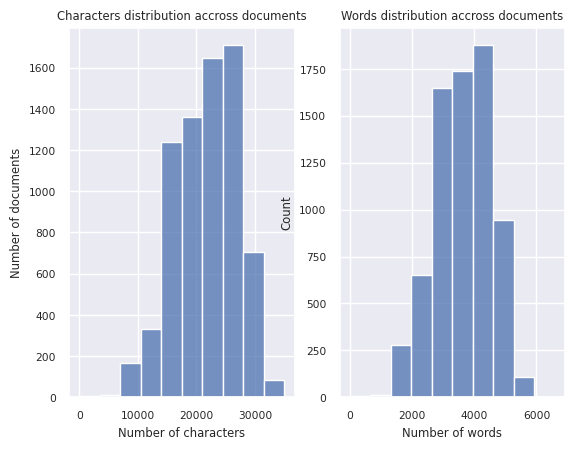

In [ ]:
f, axes = plt.subplots(1, 2)
sns.histplot(sources.chars_count, bins=10, ax=axes[0]).set(title='Characters distribution accross documents', xlabel='Number of characters', ylabel='Number of documents')
sns.histplot(sources.words_count, bins=10, ax=axes[1]).set(title='Words distribution accross documents', xlabel='Number of words')
plt.show()

Now we know that most of our documents contain between 3,000 and 4,000 words and around 20,000 characters. This is important from a pragmatic point of view: as topic modelling is essentially a statistical method, the length of each modelled item, i.e., the document, does matter. Indeed, it makes a
difference when we draw our conclusions on the relevance of the topics.

Another way to further explore our sources is to visualise how our files are distributed in our collection. This may be particularly valuable in the case of timestamped files to visualise how they distribute over time, for example to identify potential gaps in the sources. Depending on individual research questions, this feature can also be helpful to create a subset of the corpus. Let's see how this works in *kiara*.

In [ ]:
kiara.retrieve_operation_info('viz_data_query')

Author(s)                                                                                                                                  
                     Lorella Viola       lorella.viola@uni.lu                                                                               
                     Mariella De Crouy   mariella.decrouychanel@uni.lu                                                                      
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_benelux_2023                                                                                           
                     Labels       package: kiara_plugin.dh_benelux_2023                                                                     
                     References   source_repo: ]8;id=880790;https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023]8;;\                               
                                  documentation: ]8;id=421745;https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/]8;;\                             
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   This module processes a dataset to display a visualization of the corpus aggregated by a period of     
                                     time.                                                                                                  
                                                                                                                                            
                                     It aims at serving as a visual aid to create a subset of a table.                                      
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name     type     description                                  Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       distribution   string   The wished data periodicity to display on    yes        -- no default --     
                                                               visualization, values can be either                                          
                                                               'day','month' or 'year'.                                                     
                                       column         string   The column that contains publication names   yes        -- no default --     
                                                               or ref/id.                                                                   
                                       table          table    The table for which the distribution is      yes        -- no default --     
                                                               needed.                                                                      
                                                                                                                                            
                        

Let's try this module on our sources.

In [ ]:
inputs = {
    'distribution' : 'month',
    'column' : 'pub_name',
    'table': text_stats['table_output']
}

viz_data = kiara.run_job('viz_data_query', inputs=inputs)

To visualise the results, we need an additional, external package called *Observable*. Let's import it and embed it into our workflow.

In [ ]:
from observable_jupyter import embed

In [ ]:
embed('@dharpa-project/timestamped-corpus', cells=['viewof chart', 'style'], inputs={"data":viz_data['viz_data'].data.list_data,"scaleType":'height', "timeSelected":'month'})

Wonderful! Now we know immediately that although our corpus on the whole spans from December 1898 to December 1920, the two newspapers' titles are not perfectly comparable. Specifically, *Cronaca Sovversiva* covers from May 1903 to May 1919 (with two gaps in 1918 and 1919). *L'Italia* also presents gaps in 1898 and 1899. We can also immediately see how many files we have in each month for each title, which will allow us to moderate our conclusions accordingly.

Now that we know how our files are distributed in the corpus, we may consider creating a subset so as to obtain a more comparable sample. Let's do that.

In [ ]:
kiara.retrieve_operation_info('query.table')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         tabular                                                                                                   
                     Labels       package: kiara_plugin.tabular                                                                             
                     References   source_repo: ]8;id=970733;https://github.com/DHARPA-Project/kiara_plugin.tabular\https://github.com/DHARPA-Project/kiara_plugin.tabular]8;;\                                       
                                  documentation: ]8;id=488672;https://DHARPA-Project.github.io/kiara_plugin.tabular/\https://DHARPA-Project.github.io/kiara_plugin.tabular/]8;;\                                     
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Execute a sql query against an (Arrow) table.                                                          
                                                                                                                                            
                                     The default relation name for the sql query is 'data', but can be modified by the 'relation_name'      
                                     config option/input.                                                                                   
                                                                                                                                            
                                     If the 'query' module config option is not set, users can provide their own query, otherwise the       
                                     pre-set                                                                                                
                                     one will be used.                                                                                      
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name      type     description                                 Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table           table    The table to query                          yes        -- no default --     
                                       query           string   The query, use the value of the             yes        -- no default --     
                                                                'relation_name' input as table, e.g.                                        
                                                                'select * from data'.                                                       
                                       relation_name   string   The name the table is referred to in the    no         data                 
                                        

Let's first create our specific time span in the form of a query. As we want to create a comparable sample, let's select a timeframe which includes files from both titles (i.e., from 06.06.1903 and finish 06.06.1905)

In [ ]:
date_ref_1 = "1903-6-6"
date_ref_2 = "1905-6-6"
query = f"SELECT * FROM sources WHERE date <= DATE '{date_ref_2}' AND date > DATE '{date_ref_1}'"

In [ ]:
inputs = {
    'query' : query,
    'table': text_stats['table_output']
}

subset = kiara.run_job('query.table', inputs=inputs)
subset

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   query_result                                                                                                                           │
│                    id     rel_path   mime_typ   size    content    file_nam   date       pub_ref    pub_name    chars_co   words_cou     │
│                   ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                    1      Cronaca_   text/pla   11730   Ebdomada   20122712   1903-06-   20122712   Cronaca_S   11648      2167          │
│                    2      Cronaca_   text/pla   11482   ANNO I.    20122712   1903-06-   20122712   Cronaca_S   11397      1890          │
│                    3      Cronaca_   text/pla   10839   Ebdomadà   20122712   1903-06-   20122712   Cronaca_S   10748      1700          │
│                    4      Cronaca_   text/pla   11032   NUMERO 5   20122712   1903-07-   20122712   Cronaca_S   10954      1747          │
│                    5      Cronaca_   text/pla   10648   ANNO I.    20122712   1903-07-   20122712   Cronaca_S   10552      1783          │
│                    6      Cronaca_   text/pla   10682   ANNO I.    20122712   1903-08-   20122712   Cronaca_S   10620      1729          │
│                    7      Cronaca_   text/pla   11522   Ciac vtj   20122712   1903-08-   20122712   Cronaca_S   11430      2002          │
│                    8      Cronaca_   text/pla   11988   NUMERO 1   20122712   1903-08-   20122712   Cronaca_S   11799      1949          │
│                    9      Cronaca_   text/pla   11286   Ebdomada   20122712   1903-08-   20122712   Cronaca_S   11186      1866          │
│                    10     Cronaca_   text/pla   10835   SUMERO 1   20122712   1903-08-   20122712   Cronaca_S   10771      1752          │
│                    11     Cronaca_   text/pla   10750   Ebdomada   20122712   1903-09-   20122712   Cronaca_S   10683      1749          │
│                    12     Cronaca_   text/pla   11003   ANNO I.    20122712   1903-09-   20122712   Cronaca_S   10922      1776          │
│                    13     Cronaca_   text/pla   11198   ANNO I.    20122712   1903-09-   20122712   Cronaca_S   11118      1744          │
│                    14     Cronaca_   text/pla   10860   NUMERO 1   20122712   1903-09-   20122712   Cronaca_S   10769      1761          │
│                    15     Cronaca_   text/pla   10778   li         20122712   1903-10-   20122712   Cronaca_S   10705      1753          │
│                    16     Cronaca_   text/pla   11300   ANNO I.    20122712   1903-10-   20122712   Cronaca_S   11187      1860          │
│                    ...    ...        ...        ...     ...        ...        ...        ...        ...         ...        ...           │
│                    ...    ...        ...        ...     ...        ...        ...        ...        ...         ...        ...           │
│                    2400   L'Italia   text/pla   26986   PATRIA E   sn850664   1905-05-   sn850664   L'Italia    26449      4478          │
│                    2401   L'Italia   text/pla   25399   PATRIA E   sn850664   1905-05-   sn850664   L'Italia    25003      4141          │
│                    2402   L'Italia   text/pla   25708   { PATRIA   sn850664   1905-05-   sn850664   L'Italia    25281      4172          │
│                    2403   L'Italia   text/pla   26

Excellent! Now we are all set to start pre-processing our sources, that is Stage 1 of of NLP.

# **Natural Language Processing (Stage 1)**
Now we are ready for preparing our texts for analysis, that would be stage 1. Let's see what operations are included in *kiara* for NLP in the `kiara_plugin.language_processing package`.

In [ ]:
infos = kiara.retrieve_operations_info()
operations = {}
for op_id, info in infos.item_infos.items():
    if info.context.labels.get("package", None) == "kiara_plugin.language_processing":
        operations[op_id] = info

print(operations.keys())

dict_keys(['create.stopwords_list', 'generate.LDA.for.tokens_array', 'preprocess.tokens_array', 'tokenize.string', 'tokenize.texts_array'])


In order to process and analyse our sources, we need to work with the textual content in the column 'content' of the table we just created. Let's explore the available operations specific for tables by running `kiara.list_operation_ids('table')`.

In [ ]:
kiara.list_operation_ids('table')

['create.database.from.table',
 'create.table.from.file',
 'create.table.from.file_bundle',
 'export.table.as.csv_file',
 'extract.date_array.from.table',
 'import.table.from.local_file_path',
 'import.table.from.local_folder_path',
 'query.table',
 'table.pick.column',
 'table_filter.drop_columns',
 'table_filter.select_columns',
 'table_filter.select_rows']

As we are interested in one column, the `table.pick.column` operation seems like a good fit.

In [ ]:
inputs = {
    'table': subset['query_result'],
    'column_name': 'content'
}

text_contents = kiara.run_job('table.pick.column', inputs=inputs)
text_contents

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field   value                                                                                                                          │
│  ──────────────────────────────────────────────────────────────────                                                                      │
│   array                                                                                                                                  │
│             Ebdomadario anarchico di propaganda rivoluzionaria.                                                                          │
│             ANNO I.                                                                                                                      │
│             Ebdomadàrio anarchico di propaganda rivoluzionaria.                                                                          │
│             NUMERO 5                                                                                                                     │
│             ANNO I.                                                                                                                      │
│             ANNO I.                                                                                                                      │
│             Ciac vtj'y inn                                                                                                               │
│             NUMERO 11                                                                                                                    │
│             Ebdomadario anarchico di propaganda: rivoluzionaria.                                                                         │
│             SUMERO 13                                                                                                                    │
│             Ebdomadario anarchico di propaganda rh                                                                                       │
│             ANNO I.                                                                                                                      │
│             ANNO I.                                                                                                                      │
│             NUMERO 17                                                                                                                    │
│             li                                                                                                                           │
│             ANNO I.                                                                                                                      │
│             ...                                                                                                                          │
│             ...                                                                                                                          │
│             PATRIA E UMANITÀ’                                                                                                            │
│             PATRIA E UMANITÀ'                                                                                                            │
│             { PATRIA E UMANI!/ {                                                                                                         │
│             PATRIA E UMANITÀ* j                                                                                                          │
│             PATRIA E UMANITÀ*                                                                                                            │
│             -PATRIA E UMANITÀ*                    

Before performing any operation, we should start by tokenising our text. Tokenisation is a process that tells the machine at which level we want to perform our operations (e.g., character level, word level, sentence level). In other words, by tokenising we define the boundaries of the elements in our texts.

If you're unsure about which ones of these operations you should run, you can refer to the in-built explanation in each *kiara* module or refer to this repository [here](https://github.com/DHARPA-Project/TopicModelling-) for further information about pros and cons of each pre-processing operation.

In [ ]:
kiara.retrieve_operation_info('tokenize.texts_array')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         language_processing, tokenize, tokens                                                                     
                     Labels       package: kiara_plugin.language_processing                                                                 
                     References   source_repo: ]8;id=460267;https://github.com/DHARPA-Project/kiara_plugin.language_processing\https://github.com/DHARPA-Project/kiara_plugin.language_processing]8;;\                           
                                  documentation: ]8;id=597584;https://DHARPA-Project.github.io/kiara_plugin.language_processing/\https://DHARPA-Project.github.io/kiara_plugin.language_processing/]8;;\                         
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Split sentences into words or words into characters.                                                   
                                                                                                                                            
                                     In other words, this operation establishes the word boundaries (i.e., tokens) a very helpful way of    
                                     finding patterns. It is also the typical step prior to stemming and lemmatization                      
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name         type      description                             Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       texts_array        array     An array of text items to be            yes        -- no default --     
                                                                    tokenized.                                                              
                                       tokenize_by_word   boolean   Whether to tokenize by word             no         True                 
                                                                    (default), or character.                                                
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name     type    description                                                                   
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                

As we will later perform topic modelling which works at the level of words, let's tokenise our texts at word level.

In [ ]:
inputs = {
    'texts_array': text_contents['array']
}

tokens = kiara.run_job('tokenize.texts_array', inputs=inputs)
tokens

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────                               │
│   tokens_array                                                                                                                           │
│                    ['Ebdomadario', 'anarchico', 'di', 'propaganda', 'rivoluzionaria', '.', 'XJt', ' ...                                  │
│                    ['ANNO', 'I.', 'NUMERO', '31', 'VVER', 'Ebdomadario', 'anarchico', 'di', 'propag ...                                  │
│                    ['Ebdomadàrio', 'anarchico', 'di', 'propaganda', 'rivoluzionaria', '.', 'Ut', 'r ...                                  │
│                    ['NUMERO', '5', 'Ebdomadario', 'anarchico', 'di', 'propaganda', 'rivoluzionaria' ...                                  │
│                    ['ANNO', 'I.', 'KtJ', 'SIERO', '8', 'Ebdomadario', 'anarchico', 'di', 'propagand ...                                  │
│                    ['ANNO', 'I.', 'NUMEHO', '9', 'Ebdomadario', 'anarchico', 'di', 'propaganda', 'r ...                                  │
│                    ['Ciac', 'vtj', "'", 'y', 'inn', 'NUMERO', '10', 'Ebdomadario', 'anarchico', 'di ...                                  │
│                    ['NUMERO', '11', 'Ebdomadario', 'anarchico', 'di', 'propaganda', 'rivoluzionaria ...                                  │
│                    ['Ebdomadario', 'anarchico', 'di', 'propaganda', ':', 'rivoluzionaria', '.', 'Ut ...                                  │
│                    ['SUMERO', '13', 'Ebdomadario', 'anarchico', 'di', 'propaganda', 'rivoluzionaria ...                                  │
│                    ['Ebdomadario', 'anarchico', 'di', 'propaganda', 'rh', '.', "'-'-", "'", '--', " ...                                  │
│                    ['ANNO', 'I.', 'NUMERO', '15', '-', 'Ebdomadario', 'anarchico', 'di', 'propagand ...                                  │
│                    ['ANNO', 'I.', 'NtLNJEKO', '16', 'SOVVERSIVA', 'Ebdomadario', 'anarchico', 'di', ...                                  │
│                    ['NUMERO', '17', 'Ebdomadario', 'anarchico', 'di', 'propaganda', 'rivoluzionaria ...                                  │
│                    ['li', 'ANNO', 'I.', 'NUMERO', '1S', '....', '.', 'Ebdomadario', 'anarchico', 'd ...                                  │
│                    ['ANNO', 'I.', 'NUMERO', '19', 'CRONACA', 'SOWÉRSIY', 'Ebdomadario', 'anarchico' ...                                  │
│                    ...                                                                                                                   │
│                    ...                                                                                                                   │
│                    ['PATRIA', 'E', 'UMANITÀ', '’', '!', 'FIRST', 'ITAIUN', 'DAILY', 'ON', 'TUE', 'P ...                                  │
│                    ['PATRIA', 'E', "UMANITÀ'", 'FIRST', 'ITALUN', 'DAILY', 'ON', 'TUE', 'PACIFIC',  ...                                  │
│                    ['{', 'PATRIA', 'E', 'UMANI', '!', '/', '{', 'I', 'uii', '„', 'fIRST', 'ITAIIAN' ...                                  │
│                    ['PATRIA', 'E', 'UMANITÀ', '*', 'j', 'i', 'FIRST', 'ITALIAN', 'OHIY', 'OSI', 'TR ...                                  │
│                    ['PATRIA', 'E', 'UMANITÀ', '*', 'FIRST', 'ITAUAN', 'DUIY', '0', '*', 'THE', 'PAC ...                                  │
│                    ['-PATRIA', 'E', 'UMANITÀ', '*'

Now that the text of our files is tokenised, we can experiment with different pre-processing operations. Again, we can use the `kiara.retrieve_operation_info` to explore what *kiara* can do.

In [ ]:
kiara.retrieve_operation_info('preprocess.tokens_array')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         language_processing, tokens, preprocess                                                                   
                     Labels       package: kiara_plugin.language_processing                                                                 
                     References   source_repo: ]8;id=675203;https://github.com/DHARPA-Project/kiara_plugin.language_processing\https://github.com/DHARPA-Project/kiara_plugin.language_processing]8;;\                           
                                  documentation: ]8;id=968718;https://DHARPA-Project.github.io/kiara_plugin.language_processing/\https://DHARPA-Project.github.io/kiara_plugin.language_processing/]8;;\                         
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Preprocess lists of tokens, incl. lowercasing, remove special characers, etc.                          
                                                                                                                                            
                                     Lowercasing: Lowercase the words. This operation is a double-edged sword. It can be effective at       
                                     yielding potentially better results in the case of relatively small datasets or datatsets with a       
                                     high percentage of OCR mistakes. For instance, if lowercasing is not performed, the algorithm will     
                                     treat USA, Usa, usa, UsA, uSA, etc. as distinct tokens, even though they may all refer to the same     
                                     entity. On the other hand, if the dataset does not contain such OCR mistakes, then it may become       
                                     difficult to distinguish between homonyms and make interpreting the topics much harder.                
                                                                                                                                            
                                     Removing stopwords and words with less than three characters: Remove low information words. These      
                                     are typically words such as articles, pronouns, prepositions, conjunctions, etc. which are not         
                                     semantically salient. There are numerous stopword lists available for many, though not all,            
                                     languages which can be easily adapted to the individual researcher's needs. Removing words with less   
                                     than three characters may additionally remove many OCR mistakes. Both these operations have the dual   
                                     advantage of yielding more reliable results while reducing the size of the dataset, thus in turn       
                                     reducing the required processing power. This step can therefore hardly be considered optional in TM.   
                                                                                                                                            
                

*kiara* includes the most widely used text analysis pre-processing operations. Let's try some of them and take a few moments to notice how they change our texts.

Let's start by removing stopwords. These are low information words, i.e., not semantically salient such as articles, pronouns, prepositions, conjunctions, etc. There are numerous stopword lists available for many, though not all, languages which can be easily adapted to the individual researcher's needs. Here we are defining our stopword list but feel free to experiment with your own.

Let's retrieve our stopword list from our kiara's GitHub repository. If you have your own stopword list, you can define it as a variable and skip this step.

In [ ]:
! wget https://raw.githubusercontent.com/DHARPA-Project/kiara.examples/main/examples/workshops/dh_benelux_2023/notebook/stop_words.csv

--2023-09-19 09:06:57--  https://raw.githubusercontent.com/DHARPA-Project/kiara.examples/main/examples/workshops/dh_benelux_2023/notebook/stop_words.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5156 (5.0K) [text/plain]
Saving to: ‘stop_words.csv’

stop_words.csv      100%[===================>]   5.04K  --.-KB/s    in 0s      

2023-09-19 09:06:57 (54.5 MB/s) - ‘stop_words.csv’ saved [5156/5156]



In [ ]:
import pandas as pd
custom_stopword_list = list(pd.read_csv('stop_words.csv')['stopword'])

Now that we have defined our stopword list, let's tell *kiara* to use it.

In [ ]:
inputs = {
    "languages": ["italian", "english"],
    "stopwords": custom_stopword_list
}

stopwords_outputs = kiara.run_job('create.stopwords_list', inputs=inputs)
my_stopwords_list = stopwords_outputs['stopwords_list']
my_stopwords_list.data

ListModel(list_data=['Indiana', 'Not', 'Which', 'Who', 'a', 'ab', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'about', 'above', 'ac', 'accidenti', 'ad', 'adesso', 'af', 'affinche', 'after', 'again', 'against', 'agl', 'agli', 'ahime', 'ahimã¨', 'ahimè', 'ai', 'ain', 'al', 'alcuna', 'alcuni', 'alcuno', 'ali', 'alio', 'all', 'alla', 'alle', 'allo', 'allora', 'altre', 'altri', 'altrimenti', 'altro', 'altrove', 'altrui', 'am', 'ami', 'an', 'anche', 'ancho', 'anco', 'ancora', 'and', 'ani', 'anni', 'anno', 'ano', 'ansa', 'anticipo', 'any', 'aono', 'ap', 'ar', 'are', 'aren', "aren't", 'as', 'assai', 'at', 'attesa', 'attraverso', 'au', 'avanti', 'avemmo', 'avendo', 'avente', 'aver', 'avere', 'averlo', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avu

As you can see, our customed stopword list contains Italian and English. This is tailored to the specificity of our sources, newspapers written by Italian Americans that are mostly in Italian but which also contain some English text. Using a customed list is preferable in most cases as it likely improves the quality of the results.
We can now go ahead and ask *kiara* to remove the stopwords from our texts.

Other pre-processing operations that we can perform to potentially improve the quality of our results are lowercasing and remove all the tokens shorter or equal to a value that we set. Again, this is another example of interventions on the sources that depend on the researcher's choices and that are based on the specificity of the sources. In this case, as we are working with historical newspapers, the quality of the OCR content is not optimal, meaning that our texts contain several errors. Removing tokens shorter than or equal to X characters for example may remove many of such errors. Here we are definining this value at 2 but feel free to experiment with different options based on your sources. Again, it is important to keep in mind that each intervention on our sources heavily transforms them and as such, it has pros and cons. For this reason, although it is possible to combine more operations into one function, it is a good idea to proceed step-by-step and see how our choices are impacting on the material.

For the purposes of this tutorial, let's combine lowercasing with removing any words with non-alpha tokens that is removing all tokens that include punctuation and numbers (e.g., ex1a.mple) and tokens that contain less than two characters.

In [ ]:
inputs = {
    'tokens_array': tokens['tokens_array'],
    'remove_stopwords' : my_stopwords_list,
    'to_lowercase': True,
    'remove_non_alpha': True,
    'remove_short_tokens': 2
}

preprocessed_tokens = kiara.run_job('preprocess.tokens_array', inputs=inputs)
preprocessed_tokens

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────                               │
│   tokens_array                                                                                                                           │
│                    ['ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'xjt', 'redezt', 'm ...                                  │
│                    ['numero', 'vver', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', ' ...                                  │
│                    ['ebdomadàrio', 'anarchico', 'propaganda', 'rivoluzionaria', 'redeat', 'miseris' ...                                  │
│                    ['numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redeat', ...                                  │
│                    ['ktj', 'siero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 're ...                                  │
│                    ['numeho', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redeai', ...                                  │
│                    ['ciac', 'vtj', 'inn', 'numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivo ...                                  │
│                    ['numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redest', ...                                  │
│                    ['ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'rtdest', 'miscris' ...                                  │
│                    ['sumero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redesi', ...                                  │
│                    ['ebdomadario', 'anarchico', 'propaganda', 'czpcrbis', 'annuo', 'interno', 'este ...                                  │
│                    ['numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redeat', ...                                  │
│                    ['ntlnjeko', 'sovversiva', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzion ...                                  │
│                    ['numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redeai', ...                                  │
│                    ['numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redesi', ...                                  │
│                    ['numero', 'cronaca', 'sowérsiy', 'ebdomadario', 'anarchico', 'propaganda', 'riv ...                                  │
│                    ...                                                                                                                   │
│                    ...                                                                                                                   │
│                    ['patria', 'umanità', 'first', 'itaiun', 'pacific', 'coast', 'illustrateti', 'it ...                                  │
│                    ['patria', 'first', 'italun', 'pacific', 'coast', 'lllrstratcd', 'italiafi', 'pa ...                                  │
│                    ['patria', 'umani', 'uii', 'first', 'itaiian', 'oniy', 'ime', 'paciftc', 'cnly', ...                                  │
│                    ['patria', 'umanità', 'first', 'italian', 'ohiy', 'pacific', 'coast', 'lllritrat ...                                  │
│                    ['patria', 'umanità', 'first', 'itauan', 'duiy', 'pacific', 'coast', 'illustrate ...                                  │
│                    ['umanità', 'fltst', 'italia', 

Great! Another operation that we can perform to improve the quality of our topic model is to transform our corpus into a dictionary of n-grams, typically bi-grams or tri-grams. These are pairs or triples of words that are statistically more likely to occur together than if they were found independently from each other. Several studies (see for instance Wallach, 2006; Wang et al., 2007; Kherwa and Bansal, 2020) have indeed reported that using bi-grams to prepare the corpus may increase topics’ interpretability. The efficiency of statistical methods such as perplexity and coherence (more on this later in the tutorial) is also believed to improve on a coprus of n-grams.Beware however that preparing the corpus as a dictionary of n-grams is a lengthy and intense process which may be energy and time consuming, especially in the case of very large repositories.

In [ ]:
kiara.retrieve_operation_info('get_bigrams')

Author(s)                                                                                                                                  
                     Lorella Viola       lorella.viola@uni.lu                                                                               
                     Mariella De Crouy   mariella.decrouychanel@uni.lu                                                                      
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_benelux_2023                                                                                           
                     Labels       package: kiara_plugin.dh_benelux_2023                                                                     
                     References   source_repo: ]8;id=471935;https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023]8;;\                               
                                  documentation: ]8;id=114389;https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/]8;;\                             
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   This module computes bigrams and/or trigrams.                                                          
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name          type      description                            Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       tokens              array     The array containing the tokens.       yes        -- no default --     
                                       bigrams_threshold   integer   Score threshold for forming the        yes        -- no default --     
                                                                     phrases (a higher score means fewer                                    
                                                                     phrases)                                                               
                                       bigrams_min_count   integer   Ignore phrases with total collected    yes        -- no default --     
                                                                     count lower than this value.                                           
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name     type    description                                                                   
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                        

The built-in documentation gives us some insights into the parameters that the user can tweak and experiment with. Here we are defining these values as shown below but feel free to experiment with different combinations. You as an expert are the best judge of which combination is more informative.

In [ ]:
inputs = {
    'tokens' : preprocessed_tokens['tokens_array'],
    'bigrams_threshold' : 20,
    'bigrams_min_count' : 3,
}

bigrams = kiara.run_job('get_bigrams', inputs=inputs)
bigrams

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────                               │
│   tokens_array                                                                                                                           │
│                    ['ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'xjt', 'redezt', 'miserìs ...                                  │
│                    ['numero', 'vver', 'ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'redeat ...                                  │
│                    ['ebdomadàrio', 'anarchico_propaganda', 'rivoluzionaria_redeat', 'miseris_aheat' ...                                  │
│                    ['numero_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria_redeat', 'miseiis ...                                  │
│                    ['ktj', 'siero', 'ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'redest', ...                                  │
│                    ['numeho', 'ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'redeai', 'mise ...                                  │
│                    ['ciac', 'vtj', 'inn', 'numero_ebdomadario', 'anarchico_propaganda', 'rivoluzion ...                                  │
│                    ['numero_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria_redest', 'miserò' ...                                  │
│                    ['ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'rtdest', 'miscris', 'abe ...                                  │
│                    ['sumero', 'ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'redesi', 'mtse ...                                  │
│                    ['ebdomadario_anarchico', 'propaganda', 'czpcrbis', 'annuo_interno', 'estero_sem ...                                  │
│                    ['numero_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria_redeat', 'miseiis ...                                  │
│                    ['ntlnjeko', 'sovversiva_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria', ...                                  │
│                    ['numero_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria_redeai', 'miseris ...                                  │
│                    ['numero_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria_redesi', 'mtseris ...                                  │
│                    ['numero', 'cronaca', 'sowérsiy', 'ebdomadario_anarchico', 'propaganda_rivoluzio ...                                  │
│                    ...                                                                                                                   │
│                    ...                                                                                                                   │
│                    ['patria_umanità', 'first', 'itaiun', 'pacific_coast', 'illustrateti', 'italia', ...                                  │
│                    ['patria', 'first', 'italun', 'pacific_coast', 'lllrstratcd', 'italiafi', 'paper ...                                  │
│                    ['patria_umani', 'uii', 'first_itaiian', 'oniy', 'ime', 'paciftc', 'cnly', 'lihi ...                                  │
│                    ['patria_umanità', 'first_italian', 'ohiy', 'pacific_coast', 'lllritrated', 'ita ...                                  │
│                    ['patria_umanità', 'first_itauan', 'duiy', 'pacific_coast', 'illustrateci', 'ito ...                                  │
│                    ['umanità', 'fltst', 'italia', 

Excellent! Now we are all set to create our first topic model with *kiara*, that is Stage 2 of of NLP.

# **Natural Language Processing (Stage 2)**
Now we are ready for analysing our texts, that would be stage 2. Let's see what operations are included in *kiara* for topic modelling with Latent Dirichlet Allocation (LDA), that is the statistical package [LDA](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf), in *kiara*.

In [ ]:
kiara.retrieve_operation_info('generate.LDA.for.tokens_array')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         language_processing, LDA, tokens                                                                          
                     Labels       package: kiara_plugin.language_processing                                                                 
                     References   source_repo: ]8;id=361807;https://github.com/DHARPA-Project/kiara_plugin.language_processing\https://github.com/DHARPA-Project/kiara_plugin.language_processing]8;;\                           
                                  documentation: ]8;id=954629;https://DHARPA-Project.github.io/kiara_plugin.language_processing/\https://DHARPA-Project.github.io/kiara_plugin.language_processing/]8;;\                         
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Perform Latent Dirichlet Allocation on a tokenized corpus.                                             
                                                                                                                                            
                                     This module computes models for a range of number of topics provided by the user.                      
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name          type      description                            Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       tokens_array        array     The text corpus.                       yes        -- no default --     
                                       num_topics_min      integer   The minimal number of topics.          no         7                    
                                       num_topics_max      integer   The max number of topics.              no         7                    
                                       compute_coherence   boolean   Whether to compute the coherence       no         False                
                                                                     score for each model.                                                  
                                       words_per_topic     integer   How many words per topic to put in     no         10                   
                                                                     the result model.                                                      
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                

Research has been conducted towards implementing statistical methods that could
help researchers and practitioners find the craved ‘optimal number of topics’. Two of the most common methods are model perplexity and topic coherence, measures that score the statistical quality of different topic models based on the topics’ compositions in several models. Though not unanimously, the believed assumption behind these techniques is that a higher statistical quality yields more interpretable topics.

*kiara* currently implements Topic Coherence. The method is designed to model human judgement by scoring the composition of the topics based on how coherent, i.e., interpretable they are (Röder et al., 2015). If the coherence score increases as the number of topics increases, that would suggest that the most interpretable model is the one that displays the highest coherence value before flattening out or dropping. Coherence and perplexity are widely used to determine the number of topics; the truth is, however, that neither of these measures is ideal because what they actually score is the probability of observations and not their degree of semantic meaning (Chang et al., 2009). This is why actual human judgement should always be an available option for topic modelling. In *kiara*, we can set the Topic coherence parameter as `False` if we prefer to use human judgement. For the purposes of the tutorial, let's keep the parameter as `True`. Users can also set the range of the topics to be scored for coherence. Here we set the range between 5 and 10, this means that the algorithm will compute six topic models, that is one model for each of the number of topics we set as our preferred interval, in this case all the models for the topics between 5 and 10.

In [ ]:
inputs = {
    'tokens_array' : bigrams['tokens_array'],
    'num_topics_min' : 5,
    'num_topics_max' : 10,
    'compute_coherence': True,
}

lda = kiara.run_job('generate.LDA.for.tokens_array', inputs=inputs)
lda

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field             value                                                                                                                │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   coherence_map                                                                                                                          │
│                       dict data     {                                                                                                    │
│                                       "5": 0.2824772903166274,                                                                           │
│                                       "6": 0.27107959011763466,                                                                          │
│                                       "7": 0.2825295558129979,                                                                           │
│                                       "8": 0.2757360747083897,                                                                           │
│                                       "9": 0.2820362113223062,                                                                           │
│                                       "10": 0.27558710698035915                                                                          │
│                                     }                                                                                                    │
│                       dict schema   {                                                                                                    │
│                                       "title": "dict",                                                                                   │
│                                       "type": "object"                                                                                   │
│                                     }                                                                                                    │
│                                                                                                                                          │
│   coherence_table                                                                                                                        │
│                       topic_id   words                                                                                  num_topics       │
│                      ──────────────────────────────────────────────────────────────────────────────────────────────────────────────      │
│                       1          italia, giapponesi, roma, italiano, guerra, russi, italiana, russia, numero, ita ...   5                │
│                       2          italia, roma, italiano, giapponesi, dispaccio_telegrafico, italiana, numero, gue ...   5                │
│                       3          italia, roma, giapponesi, guerra, russia, italiano, italiani, numero, giappone,  ...   5                │
│                       4          italia, giapponesi, roma, russi, italiani, russia, italiano, italiana, guerra, n ...   5                │
│                       5          giapponesi, italia, roma, russi, italiani, presidente, russia, italiana, guerra, ...   5                │
│                       1          italia, giapponesi, italiano, russia, roma, italiani, russi, presidente, dispacc ...   6                │
│                       2          italia, roma, italiano, guerra, giapponesi, italiani, russia, dispaccio_telegraf ...   6                │
│                       3          italia, giappones

Fantastic, we have created our first topic models! But which one is the most statistically accurate? As you can see in our previous output, *kiara* prints both the topics and a coefficient next to each model. The latter is the coherence score calculated for the respective number of topics. That's all wonderful but not really human readable. A helpful way to navigate the results may be to plot the coherence score, let's give it a try.

In [ ]:
coherence_map = lda['coherence_map'].data.dict_data

<Axes: >

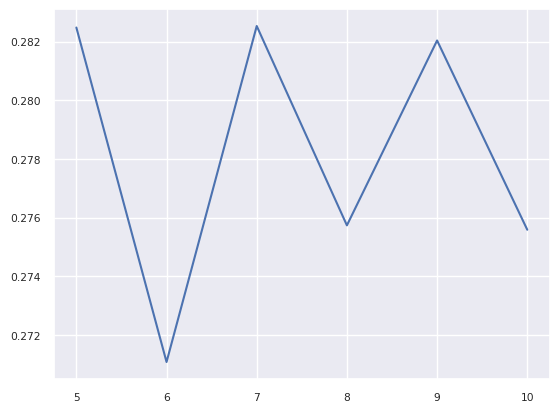

In [ ]:
sns.lineplot(coherence_map)

The coherence map helps us better understand which model is most statistically reliable. If the coherence score increases as the number of topics increases, for example, that would suggest that the most interpretable model is the one that gave the highest coherence value before flattening out. So theoretically, the most accurate model in this case would be topic model n. 8.

In [ ]:
topics_words = lda['topic_models'].data.dict_data['8']
topics_words

[(0,
  '0.003*"italia" + 0.002*"giapponesi" + 0.001*"guerra" + 0.001*"roma" + 0.001*"dispaccio_telegrafico" + 0.001*"russi" + 0.001*"russia" + 0.001*"italiana" + 0.001*"presidente" + 0.001*"numero"'),
 (1,
  '0.002*"italia" + 0.002*"giapponesi" + 0.001*"roma" + 0.001*"russia" + 0.001*"italiana" + 0.001*"guerra" + 0.001*"numero" + 0.001*"uniti" + 0.001*"italiano" + 0.001*"mente"'),
 (2,
  '0.002*"italia" + 0.001*"giapponesi" + 0.001*"roma" + 0.001*"russi" + 0.001*"russia" + 0.001*"italiani" + 0.001*"italiana" + 0.001*"italiano" + 0.001*"guerra" + 0.001*"mente"'),
 (3,
  '0.003*"italia" + 0.002*"roma" + 0.001*"russi" + 0.001*"italiani" + 0.001*"giapponesi" + 0.001*"russia" + 0.001*"guerra" + 0.001*"italiano" + 0.001*"italiana" + 0.001*"presidente"'),
 (4,
  '0.002*"italia" + 0.002*"roma" + 0.001*"italiano" + 0.001*"giapponesi" + 0.001*"guerra" + 0.001*"numero" + 0.001*"dispaccio_telegrafico" + 0.001*"italiana" + 0.001*"russia" + 0.001*"italiani"'),
 (5,
  '0.002*"italia" + 0.002*"giappon

We have almost reached the end of our tutorial. We have accomplished a lot, we have explored our sources, intervened with several customed operations, created new data, visualised them and experimented with topic modelling. Hopefully, we have also obtained insightful results from our analysis and learned a lot in the process. But how did we get here? Can we recall all the decisions we made, the turns and paths we took without going through all the cells from the top? Luckily, *kiara* has tracked all that for us; we can access this log through the function `lineage`. Let's see how it works.

In [ ]:
topics = lda['topic_models']

topics.lineage

generate.LDA.for.tokens_array
├── input: compute_coherence (boolean) = 166548aa-2ddc-480b-a7dc-4043fb634aa7
├── input: num_topics_max (integer) = e6e2b1e9-8174-41be-aa34-447931a021ab
├── input: num_topics_min (integer) = cc19b1f6-f6df-43ad-9d25-b41b8979f1c5
├── input: tokens_array (array) = 3449aa2f-4de9-4eb8-aaad-2d9e52e6de5b
│   └── get_bigrams
│       ├── input: bigrams_min_count (integer) = 5ca4ec20-68e7-40d8-a70a-25216a1e0ea2
│       ├── input: bigrams_threshold (integer) = c5e51dea-6a29-41f9-a725-b459631dee2d
│       └── input: tokens (array) = d9571c48-56dd-4565-a630-4ea35c69603e
│           └── preprocess.tokens_array
│               ├── input: remove_all_numeric (boolean) = fbfca1b2-38f3-47ec-98ef-d3c8f5e4c5aa
│               ├── input: remove_alphanumeric (boolean) = a153c125-6b68-4bce-960a-cc5c832e5cc3
│               ├── input: remove_non_alpha (boolean) = 77c71568-fe43-443d-9dfa-ef5ee4cd7df4
│               ├── input: remove_short_tokens (integer) = ca89a90a-6713-47f1-824d-14dd0e4e629a
│               ├── input: remove_stopwords (list) = 0368d479-1b4a-4f87-b3a9-84de4ca011b4
│               │   └── create.stopwords_list
│               │       ├── input: languages (list) = 4ce76714-80ea-4203-bb6b-e2bbe0a25b1c
│               │       └── input: stopwords (list) = cc704d2c-364a-4f3a-a2cd-0c7cddce1146
│               ├── input: to_lowercase (boolean) = 792b2248-a3ba-4366-98d7-7408db2a203e
│               └── input: tokens_array (array) = b7bd904f-8a27-4659-8211-44abd8e2010f
│                   └── tokenize.texts_array
│                       ├── input: texts_array (array) = b21e7396-bb3a-49b4-96f3-fb55c075035e
│                       │   └── table.pick.column
│                       │       ├── input: column_name (string) = fc8ee636-2e71-414b-ab9b-a47df445ad99
│                       │       └── input: table (table) = e217508c-d6c9-4746-8790-450548ee9ff2
│                       │           └── query.table
│                       │               ├── input: query (string) = 413739a6-903d-4976-9ad6-c8c06cd12417
│                       │               ├── input: relation_name (string) = 12bedd94-804a-445b-bf12-3ea64417c0a9
│                       │               └── input: table (table) = 2e5ea5f1-4ee1-4542-9779-84a79696b1d7
│                       │                   └── get_text_stats
│                       │                       ├── input: column_name (string) = 25620b2f-6635-4fd1-92a7-e39a88cebce8
│                       │                       └── input: table_input (table) = 9b07bbbb-ba79-4f14-aa9c-880036d84dc7
│                       │                           └── get_lccn_metadata
│                       │                               ├── input: column_name (string) = feb59c30-2755-4a50-aaff-510cff8ff2c7
│                       │                               ├── input: map (list) = f6b31400-57e5-418b-a8a7-b9f919eda7a2
│                       │                               └── input: table_input (table) = 47836afa-a1f1-4cd9-a7fb-a6ebeeab265c
│                       │                                   └── create.table
│                       │                                       └── input: file_bundle (file_bundle) = ebd5ef1a-ebe9-475b-a209-a2b1d96144cc
│                       │                                           └── download.file_bundle
│                       │                                               ├── input: sub_path (string) = e24da71d-f86c-4872-9494-b0355bb5fcca
│                       │                                               └── input: url (string) = 6993ec7b-f943-47ad-ad4c-34203c40f14c
│                       └── input: tokenize_by_word (boolean) = c14e328a-c201-4ecc-ac29-5f51abf837a7
└── input: words_per_topic (integer) = cd90655f-3acc-4444-9dcc-e714a3b2f963

As we can see, *kiara* has given a unique id to each of the operations we ran in the order we performed them starting from the last one. This map is the picture of our personal workflow to which we can return at any point for reusability purposes and transparency.

But we can also visualise this log and see how that looks like in the form of a decision tree. This may give us a more human-readable access to our personal workflow.

In [ ]:
from kiara_plugin.dh_benelux_2023.utils import augment_lineage_data

In [ ]:
augmented_nodes = augment_lineage_data(topics,kiara)

In [ ]:
from observable_jupyter import embed

In [ ]:
embed('@dharpa-project/kiara-data-lineage', cells=['displayViz', 'style'], inputs={'dataset':augmented_nodes, 'modulesNodes':12, 'valueNodes':7, 'Width': 300, 'Height': 500})

# **Conclusions**
In this tutorial, you learned about all the complex operations that digital humanists need to perform on their digital sources in order to efficiently analyse them. You also learned how to manipulate your texts and how to create a topic model of your own by tweaking parameters with your own data. While topic model can allow us to navigate the concepts present in a large corpus and gain a zoom-out perspective on the main topics, themethod presents limitations, some of which we have addressed in the turoial.

This may cause misinterpretation of meaning and ultimately wrong conclusions. It is fundamental to be mindful of how the choices and manipulations we make impact not just the sources, but the way we understand them. *kiara* enocurages critical engagement and awareness.

# **Readings**

Chang, Jonathan, Sean Gerrish, Chong Wang, Jordan Boyd-graber, and David Blei. ‘Reading Tea Leaves: How Humans Interpret Topic Models’. In Advances in Neural Information Processing Systems, edited by Y. Bengio, D. Schuurmans, J. Lafferty, C. Williams, and A. Culotta, Vol. 22. Curran Associates, Inc., 2009.


Kherwa, Pooja, and Poonam Bansal. ‘Semantic N-Gram Topic Modeling’. ICST Transactions on Scalable Information Systems 7, no. 26 (2020): 163131. https://doi.org/10.4108/eai.13-7-2018.163131.

Röder, Michael, Andreas Both, and Alexander Hinneburg. ‘Exploring the Space of Topic Coherence Measures’. In Proceedings of the Eighth ACM International Conference on Web Search and Data Mining - WSDM ’15, 399–408. Shanghai, China: ACM Press, 2015. https://doi.org/10.1145/2684822.2685324.


Wallach, Hanna M. ‘Topic Modeling: Beyond Bag-of-Words’. In Proceedings of the 23rd International Conference on Machine Learning  - ICML ’06, 977–84. Pittsburgh, Pennsylvania: ACM Press, 2006. https://doi.org/10.1145/1143844.1143967.

Wang, Xuerui, Andrew McCallum, and Xing Wei. ‘Topical N-Grams: Phrase and Topic Discovery, with an Application to Information Retrieval’. In Seventh IEEE International Conference on Data Mining (ICDM 2007), 697–702. Omaha, NE, USA: IEEE, 2007. https://doi.org/10.1109/ICDM.2007.86.

# **Further readings**

Viola, Lorella. The Humanities in the Digital: Beyond Critical Digital Humanities. S.l.: Palgrave Macmillan, 2023.


Viola, Lorella, and M. Antonio Fiscarelli. ‘From Digitised Sources to Digital Data: Behind the Scenes of (Critically) Enriching a Digital Heritage Collection’. In Proceedings of the International Conference Collect and Connect: Archives and Collections in a Digital Age, edited by Andreas Weber, Maarten Heerlien, Eulàlia Gassó Miracle, and Katherine Wolstencroft, 2810:51–64. CEUR – Workshops Proceedings, 2021. http://ceur-ws.org/Vol-2810/paper5.pdf.

Viola, Lorella, Angela R Cunningham, and Helena Jaskov. ‘Introducing the DHARPA Project: An Interdisciplinary Lab to Enable Critical DH Practice’. In The Humanities in a Digital World. virtual, 2021. https://doi.org/10.5281/zenodo.5109974.











# **About the authors**

**Dr Lorella Viola** is a research associate in linguistics and digital humanities at the Luxembourg Centre for Contemporary and Digital History (C2DH),
University of Luxembourg. She researches the implications of the digital
for the conceptualisation of digital objects, digital practices, and digital
knowledge production with a focus on heritage, material culture, and
preservation. She also investigates the relationship between language,
media, and society and develops critical, data-driven methodologies for
digital humanities and digital heritage.

**Mariella de Crouy-Chanel** works as a Research & Developement specialist at the Centre for Contemporary and Digital History (C2DH), University of Luxembourg. She holds an MSc in Computer Science and a BA in Political Science. She is currently working on developing software for digital humanities research. Her main areas of focus are data science and data visualization.